### Домашняя работа №5

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, RocCurveDisplay, PrecisionRecallDisplay, average_precision_score, brier_score_loss
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from sklearn.ensemble import RandomForestClassifier

In [261]:
df = pd.read_csv("../seminars/S05-hw-dataset.csv")
df

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,51,131729,6,687,0.283093,3,1,1,0,13136,14209,0.251680,19,3,2,0
2996,2997,35,54454,36,634,0.396180,5,5,0,0,0,10858,0.506146,2,2,12,0
2997,2998,38,63305,16,573,0.577888,2,13,0,1,24870,6689,0.366375,16,2,10,1
2998,2999,42,55606,33,689,0.659278,6,9,1,0,32677,3252,0.295284,16,2,8,1


In [262]:
df.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [264]:
df.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [265]:
df["default"].value_counts(normalize=True)

default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

#### Наблюдения:
##### Датафрейм имеет 3000 строк и 17 колонок. Среди всех них нет пропущенных значений.
##### Явных аномалий замечено не было, все значения в пределах допустимых. 
##### Таргет распределён в соотношении 41/59 (относительно 1 к 0), таргет не слишком хорошо сбалансирован, но и не сильно перекошен.

In [266]:
X = df.drop(columns=["client_id","default"])
y = df["default"]


In [267]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [268]:
baseline = DummyClassifier(strategy="most_frequent", random_state=42)
baseline.fit(X_train, y_train)

DummyClassifier(random_state=42, strategy='most_frequent')

In [269]:
y_pred= baseline.predict(X_test)
y_pred_proba = baseline.predict_proba(X_test)[:, 1]

In [270]:
acc_dum = accuracy_score(y_test, y_pred)
prec_dum = precision_score(y_test, y_pred, zero_division=0)
avr_percip_acore_dum = average_precision_score(y_test, y_pred_proba)

print(f"Accuracy: {acc_dum}" )
print(f"Precision: {prec_dum}")

try:
    roc_dum =  roc_auc_score(y_test, y_pred_proba)
    print(f"ROC_AUC: {roc_dum}")
except:
    print("Не удалось найти ROC_AUС")

Accuracy: 0.5893333333333334
Precision: 0.0
ROC_AUC: 0.5


##### Модель baseline находит самый частый класс и просто возвращает его. Точность полученной модели 58.93% . Это и есть точка отсчёта, которую новая модель должна превзойти.

In [271]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000))
])

pipe.fit(X_train, y_train)
param_grid = {
    "logreg__C": [0.01, 0.1, 1.0, 10.0, 100.0],
}

In [272]:
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="roc_auc",   
    cv=5,
    n_jobs=-1,
    verbose=1,)

grid_search.fit(X_train, y_train)

print(f"Лучшие параметры: {grid_search.best_params_}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Лучшие параметры: {'logreg__C': 1.0}


In [273]:
best_model = grid_search.best_estimator_

y_best_pred = best_model.predict(X_test)
y_best_pred_proba = best_model.predict_proba(X_test)[: , 1]

In [274]:
acc_log_reg = accuracy_score(y_test, y_best_pred)
preci_log_reg = precision_score(y_test, y_best_pred, zero_division=0)
avr_percip_acore_log_reg = average_precision_score(y_test, y_best_pred_proba)

print(f"Accuracy: {acc_log_reg}" )
print(f"Precision: {preci_log_reg }")
print(f"Average precision score: {avr_percip_acore_log_reg}")

try:
    roc_log_reg = roc_auc_score(y_test, y_best_pred_proba)
    print(f"ROC_AUC: {roc_log_reg}")
except:
    print("Не удалось найти ROC_AUС")

Accuracy: 0.7933333333333333
Precision: 0.7802197802197802
Average precision score: 0.8344235729428128
ROC_AUC: 0.8647088205911735


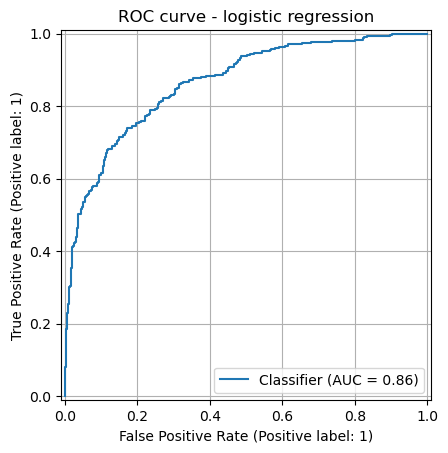

In [275]:
RocCurveDisplay.from_predictions(
    y_test,
    y_best_pred_proba
)
plt.title("ROC curve - logistic regression")
plt.grid(True)
plt.savefig("figures/ROC_plot.png")
plt.show()

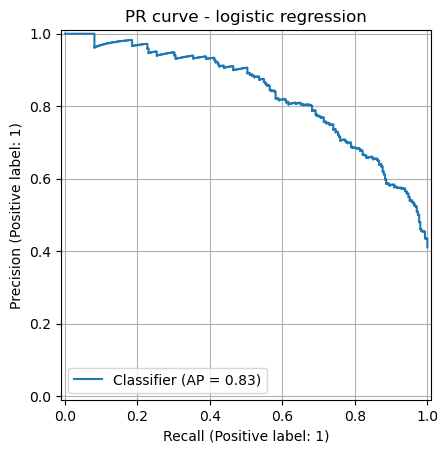

In [276]:
PrecisionRecallDisplay.from_predictions(
    y_test, 
    y_best_pred_proba
)

plt.title("PR curve - logistic regression")
plt.grid(True)
plt.savefig("figures/PR_plot.png")
plt.show()

#### Выводы

In [277]:
data = [
    [acc_dum, prec_dum, roc_dum],        
    [acc_log_reg, preci_log_reg, roc_log_reg] 
]
conclus = pd.DataFrame(data = data, index=["Dummy", "LogisticRegression"], columns= ["accuracy", "precision", "ROC_AUC"])
conclus

,accuracy,precision,ROC_AUC
Dummy,0.589333,0.00000,0.500000
LogisticRegression,0.793333,0.78022,0.864709


### Отчёт:
##### Бейзлайн при любых входных данных выводит наиболее часто встречающийся ответ, эта модель не ищет закономерности в данных. Поэтому accuracy (точность) модели почти точно совпадает с самым встречающимся классом (default = 0). 
##### Тогда как логистическая регрессия реально обучилась на предоставленных признаках, потому её точность намного больше.
##### Accuracy выросло на 20.4%
##### Precision выросло на 78%
##### ROC_AUC выросло на 36.47%
#### Для этой задачи разумнее использовать модель логистической регресии. Потому что модель DummyClassifier на любые входные данные даст один и тот же результат. Тогда как логистическая регрессия уже ищет закономерности и логику в данных, об этом свидетельствуют и результаты измерений.

### Опциональная часть

In [278]:
pipe = Pipeline([
    ("scaler", StandardScaler()),    # возьмём созданный ранее пайплайн
    ("logreg", LogisticRegression(max_iter=1000, random_state=42, C=0.1))
])

pipe.fit(X_train, y_train)  

y_proba_base = pipe.predict_proba(X_test)[:, 1]
brier_before = brier_score_loss(y_test, y_proba_base)
print("Brier score до калибровки:", brier_before)

calibrated_clf = CalibratedClassifierCV(
    estimator=pipe,
    method = "sigmoid",
    cv = 5,
    n_jobs=-1 
)

calibrated_clf.fit(X_train, y_train)
y_calibrated = calibrated_clf.predict_proba(X_test)[:, 1]
brier_after = brier_score_loss(y_test, y_calibrated)
print("Brier score после калибровки:", brier_after)

Brier score до калибровки: 0.14404813792827767
Brier score после калибровки: 0.144067269818271


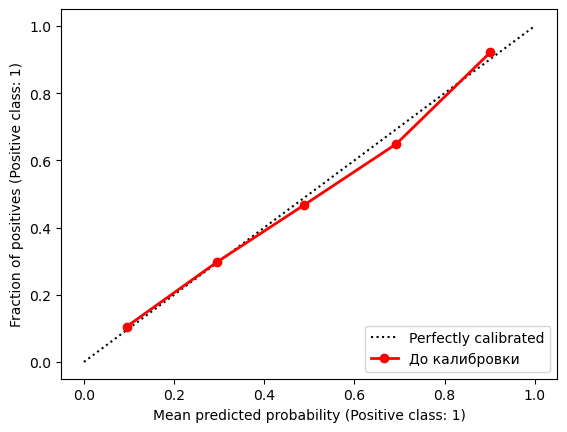

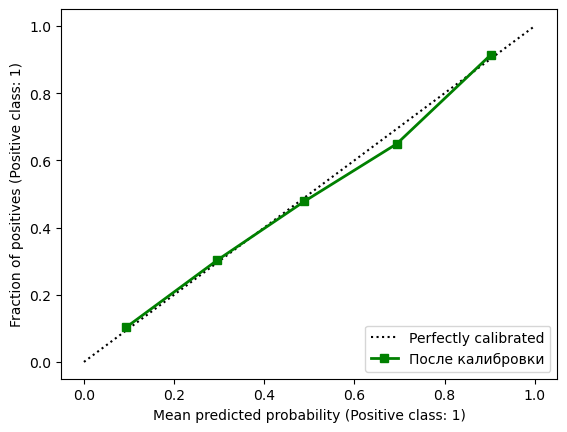

In [279]:

CalibrationDisplay.from_predictions(
    y_test,
    y_proba_base,
    name="До калибровки",
    color='red', 
    linewidth=2, 
    marker='o'
)


plt.savefig("figures/optional_calibration_before.png")

CalibrationDisplay.from_predictions(
    y_test,
    y_calibrated,
    name = "После калибровки",
    color = "green",
    linewidth = 2,
    marker = "s"
)


plt.savefig("figures/optional_calibration_after.png")


#### Как мы можем видеть по графикам, модель не изменилась совсем. Исходя из змерений разница до и после калибровки составила 0.00002